In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dados_gerais_04_11_2023.csv',index_col=[0])

In [3]:
df.shape

(352, 247)

In [4]:
#df_workers['company_size'].value_counts(normalize=True)

# RoadMap

- Segmentação dos dados
    - 1. Recorte do dataset original para pesquisadores e não trabalhadores [Por medida]
    - 2. Recorte das avaliações de cada grupo [Por medida]
    - 3. Recorte do dataset original para pesquisadores e não trabalhadores [Por critérios]
    - 4. Recorte das avaliações de cada grupo [Por critérios]    
- Criação de Radarcharts para:
    - Avaliação pela soma
    - Avaliação pela proporção de 4's e 5's
    - Avaliação pela agregação dos critérios nos 4 subgrupos

In [5]:
df_workers = df[df['What is your segment of acting?']!='Academia/Research Institution']

In [6]:
df_workers.shape

(194, 247)

In [7]:
df_academy = df[df['What is your segment of acting?']=='Academia/Research Institution']

In [8]:
df_academy.shape

(158, 247)

In [9]:
df_academy.head(2)

,M1.1,M1.2,M1.3,M1.4,M1.5,M1.6,M1.7,M1.8,M1.9,M1.10,...,M24.8,M24.9,M24.10,Local,Do you act directly with the circular economy?,Self knowledge about circular economy,What is your segment of acting?,What sector does your organization operate in?,company_size,How do you describe your position in your organization?
0,4.0,4.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,3.0,...,2.0,2.0,3.0,UK,1,4.0,Academia/Research Institution,Quinary Sector,Grande,senior researcher
1,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,4.0,...,2.0,2.0,4.0,Brazil,1,4.0,Academia/Research Institution,Quinary Sector,Grande,Staff


### Separação - Medidas para Workers

In [10]:
import numpy as np
lista = np.arange(0,24)

In [11]:
lista

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [12]:
workers_medidas={}

In [13]:
for i in lista:
    workers_medidas[i]=pd.DataFrame()
    
for i in np.arange(0,24):
    workers_medidas[i] = pd.DataFrame(df_workers.iloc[:,i*10:(i+1)*10])

### Separação - Medidas para Academy

In [14]:
academy_medidas = {}

In [15]:
for i in lista:
    academy_medidas[i]=pd.DataFrame()
    
for i in np.arange(0,24):
    academy_medidas[i] = pd.DataFrame(df_academy.iloc[:,i*10:(i+1)*10])

### Separação - Critérios para Workers

In [16]:
lista2 = np.arange(1,11)

In [17]:
workers_criterios={}
for i in lista2:
    workers_criterios[i] = pd.DataFrame()

In [18]:
for i in lista2:
    workers_criterios[i]=df_workers.iloc[:,i-1:240:10]

In [19]:
workers_criterios[10].head()

,M1.10,M2.10,M3.10,M4.10,M5.10,M6.10,M7.10,M8.10,M9.10,M10.10,...,M15.10,M16.10,M17.10,M18.10,M19.10,M20.10,M21.10,M22.10,M23.10,M24.10
2,4.0,4.0,3.0,4.0,3.0,5.0,4.0,4.0,5.0,4.0,...,4.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0
4,3.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,...,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0
5,3.0,5.0,5.0,3.0,5.0,5.0,3.0,5.0,4.0,4.0,...,3.0,4.0,3.0,3.0,2.0,4.0,4.0,4.0,2.0,4.0
6,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,...,2.0,2.0,4.0,3.0,3.0,1.0,2.0,2.0,4.0,3.0
7,3.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


### Separação - Critérios para Academy

In [20]:
lista2 = np.arange(1,11)

In [21]:
academy_criterios={}
for i in lista2:
    academy_criterios[i] = pd.DataFrame()

In [22]:
for i in lista2:
    academy_criterios[i]=df_academy.iloc[:,i-1:240:10]

In [23]:
academy_criterios[10].head()

,M1.10,M2.10,M3.10,M4.10,M5.10,M6.10,M7.10,M8.10,M9.10,M10.10,...,M15.10,M16.10,M17.10,M18.10,M19.10,M20.10,M21.10,M22.10,M23.10,M24.10
0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4.0,4.0,5.0,5.0,4.0,4.0,2.0,2.0,4.0,4.0,...,3.0,2.0,2.0,4.0,4.0,4.0,5.0,4.0,2.0,4.0
8,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
9,3.0,4.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0


### Testando normalidade

In [24]:
from scipy import stats

In [25]:
for coluna in df:
    df[coluna].fillna(df[coluna].mode()[0],inplace=True)

In [26]:
for coluna in df.iloc[:,:-7]:
    df[coluna] = df[coluna].astype(int)

In [27]:
df.iloc[:,:-7].values.reshape(-1)

array([4, 4, 3, ..., 2, 2, 5])

In [28]:
x=df.iloc[:,:-7].values.reshape(-1)

In [29]:
stats.shapiro(x).statistic

C:\Users\ednae\AppData\Local\Temp\ipykernel_8104\893702125.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 84480.
  stats.shapiro(x).statistic


0.9091459525740738

Os dados não seguem uma normal

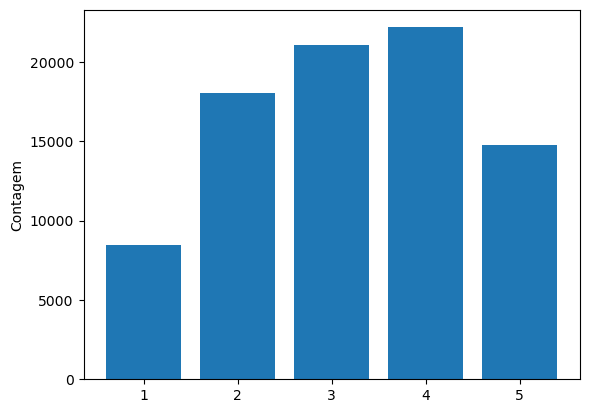

In [30]:
labels, counts = np.unique(x, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.ylabel('Contagem')
plt.show()

## Testes Pareados

- Para análise entre diferentes medidas para mesmos respondentes

1. Quais medidas possuem maiores medianas?

In [31]:
academy_medidas_medianas = pd.DataFrame()

cont=1
for i in academy_medidas:
    academy_medidas_medianas[cont] = academy_medidas[i].median(axis=1)
    cont+=1

##########

workers_medidas_medianas = pd.DataFrame()

cont=1
for i in workers_medidas:
    workers_medidas_medianas[cont] = workers_medidas[i].median(axis=1)
    cont+=1

In [32]:
workers_medidas_medianas.head(2)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
2,4.0,4.0,3.0,4.0,3.0,5.0,4.5,4.0,4.5,3.0,...,4.0,4.0,4.5,5.0,4.5,3.5,4.0,5.0,5.0,4.0
4,3.0,3.0,3.0,4.5,2.5,2.0,3.0,3.0,3.0,2.0,...,3.5,4.0,4.0,3.0,3.0,3.5,3.0,3.0,3.0,3.0


In [33]:
academy_medidas_medianas.head(2)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,3.0,3.5,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.5,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.5
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


### Academy_wilcox

In [34]:
from scipy.stats import wilcoxon
res = wilcoxon(academy_medidas_medianas[1].values,y=academy_medidas_medianas[2].values,alternative='greater')

In [35]:
res[1]

0.9980880052855329

In [36]:
np.zeros((24,24)).shape

(24, 24)

Hipóteses para o teste pareado de Wilcox
- `Ho: mediana_linha <= mediana_coluna`
- `H1: mediana_linha > mediana_coluna`

In [37]:
academy_medidas_medianas[8].isna().sum()

1

In [38]:
for colunas in academy_medidas_medianas:
    num = academy_medidas_medianas[colunas].mode()
    num = float(num)
    academy_medidas_medianas[colunas].fillna(num,inplace=True)

C:\Users\ednae\AppData\Local\Temp\ipykernel_8104\1513908047.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  num = float(num)


In [39]:
academy_medidas_medianas[8].isna().sum()

0

In [40]:
academy_wilcox = pd.DataFrame(np.zeros((24,24)))

In [41]:
linha = 0
for coluna in np.arange(1,25):
    for linha in np.arange(1,25):
        if (linha!=coluna):
            academy_wilcox.loc[linha-1,coluna-1] = wilcoxon(academy_medidas_medianas[linha].values,y=academy_medidas_medianas[coluna].values,alternative='greater')[1]
        else:
            academy_wilcox.loc[linha,coluna] = 1

In [42]:
academy_wilcox = academy_wilcox.iloc[:-1,:-1]

In [43]:
academy_wilcox.columns = np.arange(1,25)
academy_wilcox.index = np.arange(1,25)
academy_wilcox.loc[1,1]=1.0

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

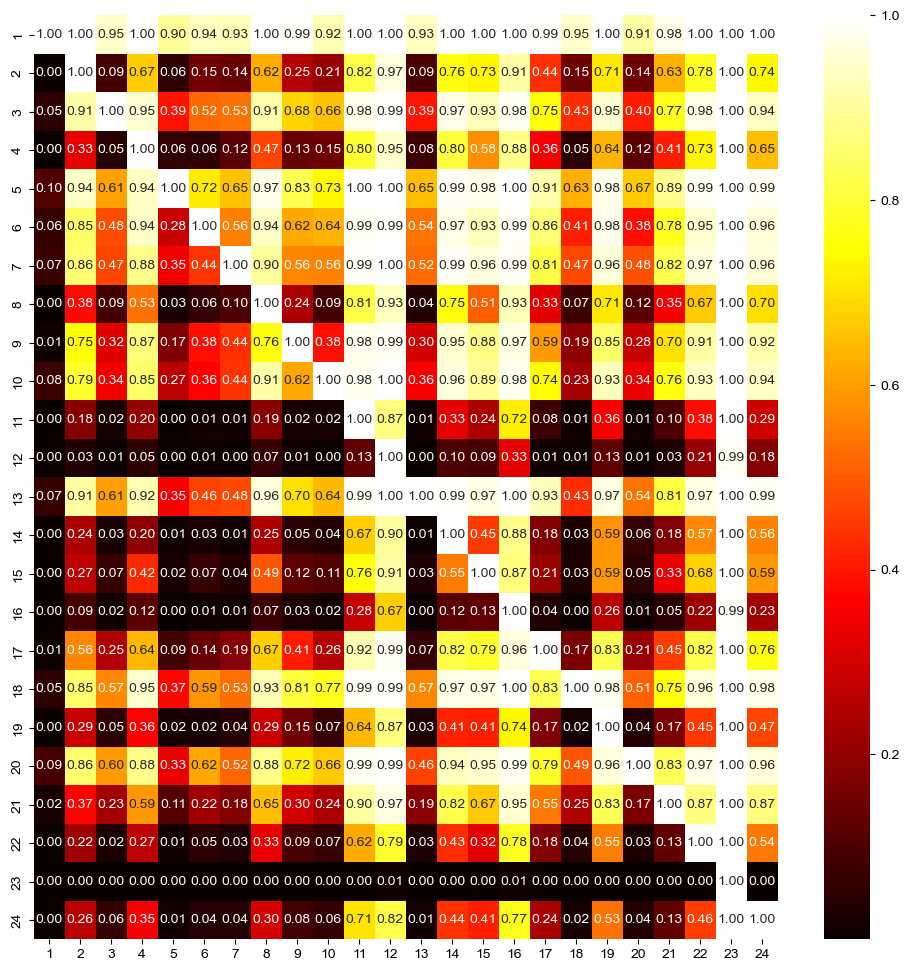

In [44]:
fig=plt.figure()
plt.figure(figsize=(12,12))
sns.heatmap(academy_wilcox, cmap='hot', annot=True, fmt=".2f")
sns.set(font_scale=.7)
fig

In [45]:
plt.savefig('wilcox1.pdf',format='pdf')

<Figure size 640x480 with 0 Axes>

`Pelo heatmap podemos perceber que a alternativa 22, domina todas as demais, pois para o teste de Wilcox, aceitamos H1, de que a mediana das suas avaliações é superior a todas as demais alternativas`

### Workes_wilcox

Hipóteses para o teste pareado de Wilcox
- `Ho: mediana_linha <= mediana_coluna`
- `H1: mediana_linha > mediana_coluna`

In [46]:
workers_wilcox = pd.DataFrame(np.zeros((24,24)))

In [47]:
workers_medidas_medianas.isna().sum()

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
dtype: int64

In [48]:
for colunas in workers_medidas_medianas:
    num = workers_medidas_medianas[colunas].mode()
    num = float(num)
    workers_medidas_medianas[colunas].fillna(num,inplace=True)

C:\Users\ednae\AppData\Local\Temp\ipykernel_8104\2187017969.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  num = float(num)


In [49]:
workers_medidas_medianas.head(2)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
2,4.0,4.0,3.0,4.0,3.0,5.0,4.5,4.0,4.5,3.0,...,4.0,4.0,4.5,5.0,4.5,3.5,4.0,5.0,5.0,4.0
4,3.0,3.0,3.0,4.5,2.5,2.0,3.0,3.0,3.0,2.0,...,3.5,4.0,4.0,3.0,3.0,3.5,3.0,3.0,3.0,3.0


In [50]:
linha = 0
for coluna in np.arange(1,25):
    for linha in np.arange(1,25):
        if (linha!=coluna):
            workers_wilcox.loc[linha-1,coluna-1] = wilcoxon(workers_medidas_medianas[linha].values,y=workers_medidas_medianas[coluna].values,alternative='greater')[1]
        else:
            workers_wilcox.loc[linha,coluna] = 1.0

In [51]:
workers_wilcox = workers_wilcox.iloc[:-1,:-1]

In [52]:
workers_wilcox.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.995151,3.082521e-02,0.999995,0.374352,0.614829,0.867529,0.992638,0.406874,0.865773,...,0.999345,0.974841,0.891879,0.586306,0.469757,0.770843,0.942979,0.999869,0.999613,0.999347
1,0.004849,1.000000,3.743940e-07,0.971548,0.000550,0.032416,0.205850,0.476159,0.017322,0.122412,...,0.842629,0.285356,0.158122,0.023116,0.037163,0.058445,0.202893,0.846566,0.874585,0.759907
2,0.969175,1.000000,1.000000e+00,1.000000,0.973480,0.986611,0.999609,0.999999,0.982080,0.998662,...,1.000000,0.999976,0.999589,0.979297,0.965481,0.995122,0.999922,1.000000,0.999999,0.999999
3,0.000005,0.028452,1.835099e-10,1.000000,0.000005,0.000596,0.005276,0.023251,0.000001,0.001216,...,0.216445,0.006617,0.005931,0.000048,0.000087,0.000396,0.003717,0.175746,0.244371,0.163856
4,0.625648,0.999450,2.651998e-02,0.999995,1.000000,0.814646,0.949384,0.995613,0.696923,0.946249,...,0.999896,0.984355,0.933177,0.662095,0.641922,0.875529,0.982002,0.999951,0.999264,0.999600


In [53]:
workers_wilcox.columns = np.arange(1,25)
workers_wilcox.index = np.arange(1,25)
workers_wilcox.loc[1,1]=1.0

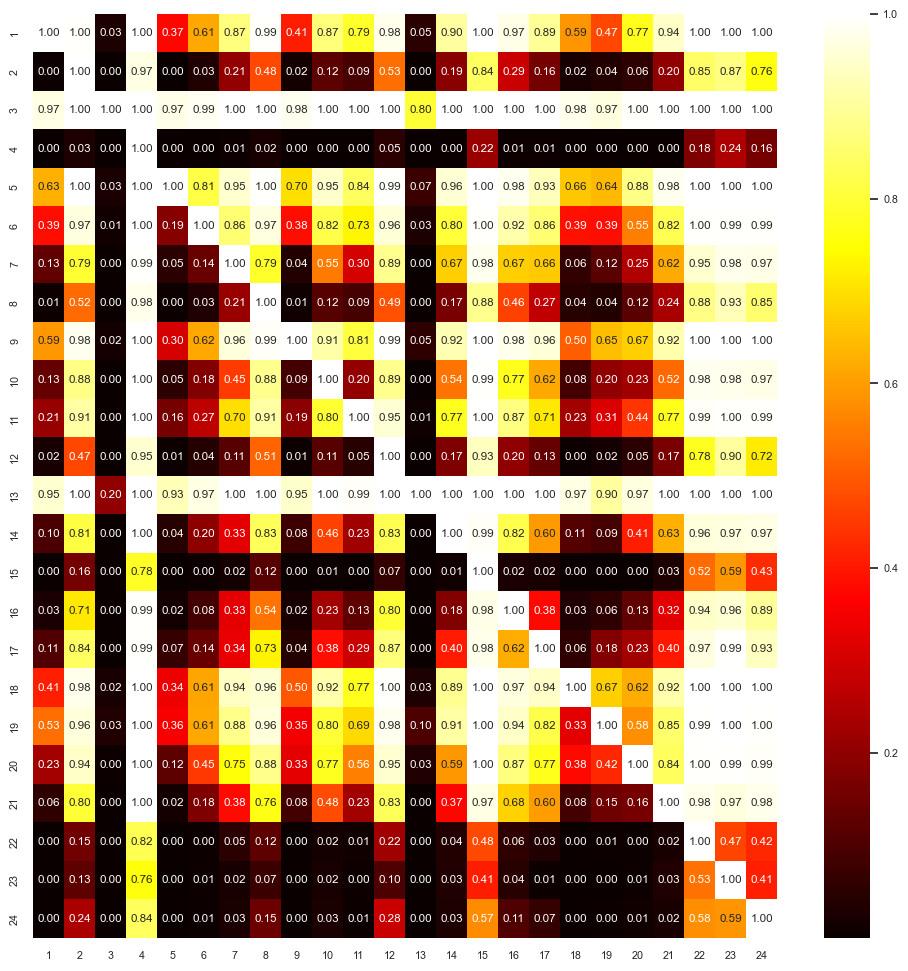

In [54]:
plt.figure(figsize=(12,12))
sns.heatmap(workers_wilcox, cmap='hot', annot=True, fmt=".2f")
sns.set(font_scale=.7)

Através do heatmap apresentado na figura /ref{heatmap_workers_wilcox}, podemos identificar os resultados das comparações par a par entre as alternativas através do teste de hipóteses apresentados, destacando-se com melhor desempenho:
 - Alternativa 04 (detalhar a alternativa): Só perde para as alternativas 12, 15, 22, 23, 24
 - Alternativa 23 (detalhar a alternativa): Só perde para as alternativas 02, 04, 08, 12, 15, 22, 24
 - Alternativa 23 (detalhar a alternativa): Só perde para as alternativas 02, 04, 08, 12, 15, 22, 24
 - Alternativa 24 (detalhar a alternativa): Só perde para as alternativas 02, 04, 08, 12, 15, 16, 17, 22, 23

Em contrapartida, as alternativas que apresentaram pior desempenho no teste de hipótese, foram:

 - Alternativa 03: Perdeu todas
 - Alternativa 13: Perdeu todas
 - Alternativa 05: Só foi melhor que uma (03)

`Pelo heatmap podemos perceber que a alternativa 22, domina todas as demais, pois para o teste de Wilcox, aceitamos H1, de que a mediana das suas avaliações é superior a todas as demais alternativas`

`CRIAR TABELA COM NUMERO DE VITORIAS E DERROTAS DE CADA ALTERNATIVA`

`WORKERS`

In [55]:
#for col in workers_wilcox:
#    workers_wilcox[col] = np.where(workers_wilcox[col] >= 0.05, 0, workers_wilcox[col])

for col in workers_wilcox:
    workers_wilcox[col] = np.where(workers_wilcox[col] < 0.05, 1, workers_wilcox[col])

In [56]:
for col in workers_wilcox:
    workers_wilcox[col] = np.where(workers_wilcox[col] != 1, 0, workers_wilcox[col])

In [57]:
workers_wilcox['win'] = workers_wilcox.sum(axis=1)-1
workers_wilcox['loss'] = 24-workers_wilcox['win']

In [58]:
workers_wilcox

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,win,loss
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,22.0
2,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,19.0,5.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0
6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,22.0
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,21.0
8,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,22.0


`ACADEMY`

In [59]:
#for col in workers_wilcox:
#    workers_wilcox[col] = np.where(workers_wilcox[col] >= 0.05, 0, workers_wilcox[col])

for col in academy_wilcox:
    academy_wilcox[col] = np.where(academy_wilcox[col] < 0.05, 1, academy_wilcox[col])

for col in academy_wilcox:
    academy_wilcox[col] = np.where(academy_wilcox[col] != 1, 0, academy_wilcox[col])

In [60]:
academy_wilcox['win'] = academy_wilcox.sum(axis=1)-1
academy_wilcox['loss'] = 24-academy_wilcox['win']
academy_wilcox

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,win,loss
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,21.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,21.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0


In [61]:
academy_wilcox.to_csv('academy_wilcox_win_loss.csv')
workers_wilcox.to_csv('workers_wilcox_win_loss.csv')

## Testes não pareados - Para grupos distintos

- Academics vs Professionals

In [64]:
df.to_csv('dados_15_03.csv')